# Machine Learning ( 2020.08.06 )

## 1. Intro

yo!

## 2. EDA

In [64]:
import easygui
import pandas as pd

In [3]:
data_file = easygui.fileopenbox()
data_file

'C:\\Python\\Project\\rawdata\\우리동네 대기 정보(한남대학교).csv'

In [4]:
data_raw = pd.read_csv(data_file)
data_raw.shape

(24, 7)

In [5]:
data_raw.head()

,YMDH,PM10,PM2.5,O3,NO2,CO,SO2
0,2020-07-06:24,25,5.0,0.046,0.005,0.3,0.002
1,2020-07-06:23,30,13.0,0.050,0.005,0.3,0.002
2,2020-07-06:22,18,12.0,0.051,0.005,0.4,0.002
3,2020-07-06:21,8,6.0,0.049,0.006,0.4,0.002
4,2020-07-06:20,14,NaN,0.042,0.008,0.4,0.002


In [8]:
# 연속형 data만 요약
data_raw.describe() 

,PM10,PM2.5,O3,NO2,CO,SO2
count,24.000000,16.000000,24.000000,24.000000,24.000000,24.000
mean,13.291667,8.000000,0.037125,0.007292,0.316667,0.002
std,6.610132,4.396969,0.020187,0.002866,0.038069,0.000
min,5.000000,2.000000,0.008000,0.004000,0.300000,0.002
25%,8.000000,5.000000,0.016250,0.005000,0.300000,0.002
50%,13.500000,6.500000,0.044000,0.007000,0.300000,0.002
75%,17.000000,10.500000,0.051000,0.008250,0.300000,0.002
max,30.000000,16.000000,0.067000,0.014000,0.400000,0.002


### 2-1. 변수 제거 

    * 숫자형만 추출 (describe 이용)
    * 같은 값 가지는 변수 제거 ( sklearn 분산 , 표준편차) 
    * 중복변수 제거

#### 2-1-1. 숫자형 추출 방법 2가지

##### 2-1-1-1. 직접 확인해서 제거

In [10]:
# 한개의 값만 가지는 변수 제거
# 분산이 0 -> 숫자형만
# 그러므로 숫자형이 아닌 0열 제거 # 수동

data_num = data_raw.iloc[:,1:]
data_num.head()

,PM10,PM2.5,O3,NO2,CO,SO2
0,25,5.0,0.046,0.005,0.3,0.002
1,30,13.0,0.050,0.005,0.3,0.002
2,18,12.0,0.051,0.005,0.4,0.002
3,8,6.0,0.049,0.006,0.4,0.002
4,14,NaN,0.042,0.008,0.4,0.002


##### 2-1-1-2. descibe()은 숫자형만 되는 걸 이용

In [11]:
## 숫자형 변수 저장 - describe() 결과 이용 #자동

data_raw_desc = data_raw.describe()
num_col_names = data_raw_desc.columns #describe 열이름 
data_num = data_raw[num_col_names] # 숫자형만 추출
data_num.head()

,PM10,PM2.5,O3,NO2,CO,SO2
0,25,5.0,0.046,0.005,0.3,0.002
1,30,13.0,0.050,0.005,0.3,0.002
2,18,12.0,0.051,0.005,0.4,0.002
3,8,6.0,0.049,0.006,0.4,0.002
4,14,NaN,0.042,0.008,0.4,0.002


In [15]:
# conda install -c anaconda scikit-learn


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\Users\gkrxo\anaconda3\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=455aee57387666e8ff2cd3946adb21df38e848eb7d144376a34ad8d91f076ec8
  Stored in directory: c:\users\gkrxo\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


#### 2-1-2. 같은 값 가지는 변수 제거 ( sklearn 분산 , 표준편차) 

##### 2-1-2-1. 분산을 이용한 열 선택

In [16]:
# package

from sklearn.feature_selection import VarianceThreshold

In [17]:

constant_filter = VarianceThreshold(threshold=0)

In [18]:
# 각 변수별 분산 계산
constant_filter.fit(data_num)

VarianceThreshold(threshold=0)

In [22]:
constant_filter.get_support() # SO2는 분산이 0

array([ True,  True,  True,  True,  True, False])

In [20]:
col_index = data_num.columns[constant_filter.get_support()]
col_index

Index(['PM10', 'PM2.5', 'O3', 'NO2', 'CO'], dtype='object')

In [54]:
## 분산이 0보다 큰 변수 선택

data_arr = constant_filter.transform(data_num)
data_use = pd.DataFrame(data_arr, columns = col_index)
data_use.head()

,PM10,PM2.5,O3,NO2,CO
0,25.0,5.0,0.046,0.005,0.3
1,30.0,13.0,0.050,0.005,0.3
2,18.0,12.0,0.051,0.005,0.4
3,8.0,6.0,0.049,0.006,0.4
4,14.0,NaN,0.042,0.008,0.4


##### 2-1-2-2. 표준편차를 이용한 열 선택

In [23]:
# or 표준편차를 이용한 열 선택
data_num_desc = data_num.describe()
data_num_std = data_num_desc.loc['std']
data_num_std

PM10     6.610132
PM2.5    4.396969
O3       0.020187
NO2      0.002866
CO       0.038069
SO2      0.000000
Name: std, dtype: float64

In [25]:
# 기준값 이라 분산 가지는 변수 제거
condition = data_num_std < 0.00001
condition_index = condition.index[condition]
data_use_0= data_raw.drop(condition_index, axis=1) # SO2 제거
data_use_0.head()

,YMDH,PM10,PM2.5,O3,NO2,CO
0,2020-07-06:24,25,5.0,0.046,0.005,0.3
1,2020-07-06:23,30,13.0,0.050,0.005,0.3
2,2020-07-06:22,18,12.0,0.051,0.005,0.4
3,2020-07-06:21,8,6.0,0.049,0.006,0.4
4,2020-07-06:20,14,NaN,0.042,0.008,0.4


In [28]:
condition

PM10     False
PM2.5    False
O3       False
NO2      False
CO       False
SO2       True
Name: std, dtype: bool

In [27]:
condition.index

Index(['PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2'], dtype='object')

In [26]:
condition.index[condition]

Index(['SO2'], dtype='object')

#### 2-1-3 중복변수 제거

    * 상관계수가 1이면 중복

In [38]:
data_use.corr()

,PM10,PM2.5,O3,NO2,CO
PM10,1.000000,0.559308,0.736098,-0.654111,0.066231
PM2.5,0.559308,1.000000,0.654725,-0.347637,0.376122
O3,0.736098,0.654725,1.000000,-0.800926,0.251762
NO2,-0.654111,-0.347637,-0.800926,1.000000,-0.086332
CO,0.066231,0.376122,0.251762,-0.086332,1.000000


In [46]:
data_use.corr()[abs(data_use.corr())>=0.7]

,PM10,PM2.5,O3,NO2,CO
PM10,1.000000,NaN,0.736098,NaN,NaN
PM2.5,NaN,1.0,NaN,NaN,NaN
O3,0.736098,NaN,1.000000,-0.800926,NaN
NO2,NaN,NaN,-0.800926,1.000000,NaN
CO,NaN,NaN,NaN,NaN,1.0


In [55]:
col_drop = set()
cor_matrix = data_use.corr()
cutoff = 0.7

In [56]:
col_names = cor_matrix.columns
for i in range(len(col_names)):
    for j in range(i):
        col_set = set([col_names[i],col_names[j]])
        if abs(cor_matrix.iloc[i,j]) > cutoff:
            if len(col_drop & col_set) == 0:
                col_drop.add(col_names[i])
col_drop

{'O3'}

In [59]:
## 상관계수 cutoff 0.7이상인 열 제거
# i have epilepsy
data_use_2 = data_use.drop(labels=col_drop,axis=1)
data_use_2.head()

,PM10,PM2.5,NO2,CO
0,25.0,5.0,0.005,0.3
1,30.0,13.0,0.005,0.3
2,18.0,12.0,0.005,0.4
3,8.0,6.0,0.006,0.4
4,14.0,NaN,0.008,0.4


### 2-2. 변수의 스케일 변환

#### 2-2-1. 표준화 변환

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
# 표준화 변환
scaler = StandardScaler()
data_use_2_std = scaler.fit(data_use_2).transform(data_use_2)


In [66]:
#DataFrame
data_use_2_std = pd.DataFrame(data_use_2_std, columns = data_use_2.columns)
data_use_2_std.describe()

,PM10,PM2.5,NO2,CO
count,2.400000e+01,16.000000,2.400000e+01,2.400000e+01
mean,1.295260e-16,0.000000,-3.238150e-16,2.590520e-16
std,1.021508e+00,1.032796,1.021508e+00,1.021508e+00
min,-1.281367e+00,-1.409329,-1.173109e+00,-4.472136e-01
25%,-8.177566e-01,-0.704664,-8.167216e-01,-4.472136e-01
50%,3.219514e-02,-0.352332,-1.039464e-01,-4.472136e-01
75%,5.730735e-01,0.587220,3.415381e-01,-4.472136e-01
max,2.582050e+00,1.879105,2.390767e+00,2.236068e+00


#### 2-2-2. 범위 변환 - 최대 최소 변환

    * 0과 1사이의 값

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
#범위 변환
scaler = MinMaxScaler()
data_use_2_std = scaler.fit(data_use_2).transform(data_use_2)
## DataFrame
data_use_2_std = pd.DataFrame(data_use_2_std, columns = data_use_2.columns)
data_use_2_std.describe()

,PM10,PM2.5,NO2,CO
count,24.000000,16.000000,24.000000,24.000000
mean,0.331667,0.428571,0.329167,0.166667
std,0.264405,0.314069,0.286628,0.380693
min,0.000000,0.000000,0.000000,0.000000
25%,0.120000,0.214286,0.100000,0.000000
50%,0.340000,0.321429,0.300000,0.000000
75%,0.480000,0.607143,0.425000,0.000000
max,1.000000,1.000000,1.000000,1.000000


### 2-3. 결측값 처리

#### 2-3-1. 결측값

##### 2-3-1-1. 제거

In [70]:
data_use_2.dropna() #실 데이터 적용 X

,PM10,PM2.5,NO2,CO
0,25.0,5.0,0.005,0.3
1,30.0,13.0,0.005,0.3
2,18.0,12.0,0.005,0.4
3,8.0,6.0,0.006,0.4
7,17.0,16.0,0.008,0.4
8,19.0,16.0,0.004,0.3
9,13.0,10.0,0.004,0.3
10,21.0,10.0,0.004,0.3
11,14.0,8.0,0.005,0.3
12,17.0,7.0,0.005,0.3


##### 2-3-1-2. 대체 (평균)

In [71]:
data_use_2.fillna(data_use_2.mean())

,PM10,PM2.5,NO2,CO
0,25.0,5.0,0.005,0.3
1,30.0,13.0,0.005,0.3
2,18.0,12.0,0.005,0.4
3,8.0,6.0,0.006,0.4
4,14.0,8.0,0.008,0.4
5,15.0,8.0,0.008,0.3
6,17.0,8.0,0.008,0.3
7,17.0,16.0,0.008,0.4
8,19.0,16.0,0.004,0.3
9,13.0,10.0,0.004,0.3


#### 2-3-2. 더미변수


In [73]:
# 자료파일 
data_file = easygui.fileopenbox()
data_file

'C:\\Python\\Project\\rawdata\\PlantGrowth.csv'

In [76]:
## csv 파일 읽기 : PlantGrowth.csv
PlantGrowth = pd.read_csv(data_file)
PlantGrowth

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [75]:
## group 변수로 더미변수 생성 - 첫번째 더미변수 제거
results = pd.get_dummies(PlantGrowth.group, drop_first=True) #ctrl 제거
results

,trt1,trt2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## 3. 모형평가 

### 3-1. 연속형 출력변수

    * 실제값 - 예측값
    차이를 구하려니 결과는 + -가 됨
    
    1. 절대값 MAE
    2. 제곱 MSE
    3. 제곱근 RMSE

In [77]:
import numpy as np

In [80]:
# 실제값
true_value = PlantGrowth.weight
# 예측 값
pred_value = np.random.randn(30)* 0.7 +5
## 오차
error_value = true_value - pred_value

In [81]:
## MAE
abs(error_value).mean()

0.6782204331750317

In [83]:
## MSE 
MSE = (error_value**2).mean()
MSE

0.8670261648739337

In [84]:
## RMSE
np.sqrt(MSE)

0.9311423977426512

### 범주형 출력 변수

In [85]:
##범주
cat_var = np.array([1,2,3])
## 실제값
true_value = np.random.choice(cat_var, 30)
## 예측값
pred_value = np.random.choice(cat_var, 30)
## 교차표
pd.crosstab(true_value,pred_value)
# row 1이 실제 값인데 col 1로 맞춘것 6개, 2로 잘못한것 4, 3으로 잘못한것 1개

col_0,1,2,3
row_0,,,
1,6,4,1
2,2,5,1
3,4,5,2


In [88]:
## library
from sklearn.metrics import classification_report


In [89]:
## 분류 성능 평가
print(classification_report(true_value, pred_value))

              precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       0.36      0.62      0.45         8
           3       0.50      0.18      0.27        11

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.41        30
weighted avg       0.46      0.43      0.41        30



-------------------------


## 4. 지도학습

### 4-1. 로지스틱

    * R에서는 범주형 변수를 더미변수로 바꿔줘야하지만,
     Python에서는 알아서 변수 제외해줌? 더미변수로 바꿔줌
     모든 모델이?
    * Scale이 필요 없음 ( 해석을 위해 하기도 함)
    
    어떤 모델에서는 scale을 해야하는가?

In [90]:
data_file = easygui.fileopenbox('Training data')
data_train = pd.read_csv(data_file)
data_train.shape

(955, 12)

In [91]:
data_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad


In [92]:
data_train.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,8.273089,0.530712,0.269246,2.518586,0.088063,15.762304,46.840314,0.996711,3.316356,0.657613,10.438517
std,1.736372,0.176862,0.194575,1.414153,0.049589,10.420662,34.002295,0.001922,0.155503,0.171136,1.076876
min,4.700000,0.120000,0.000000,0.900000,0.012000,2.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995575,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996660,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.425000,2.600000,0.090000,21.000000,62.000000,0.997800,3.410000,0.730000,11.100000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [93]:
## 검정 자료 : winequality_red_test.csv
data_file = easygui.fileopenbox("Test data")
data_test = pd.read_csv(data_file)
data_test.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34.0,0.9978,3.51,0.56,9.4,Bad
1,5.6,0.615,0.00,1.6,0.089,16,59.0,0.9943,3.58,0.52,9.9,Bad
2,7.8,0.610,0.29,1.6,0.114,9,29.0,0.9974,3.26,1.56,9.1,Bad
3,8.1,0.560,0.28,1.7,0.368,16,56.0,0.9968,3.11,1.28,9.3,Bad
4,7.4,0.590,0.08,4.4,0.086,6,29.0,0.9974,3.38,0.50,9.0,Bad


In [94]:
data_train.quality

0       Bad
1       Bad
2       Bad
3      Good
4       Bad
       ... 
950    Good
951    Good
952     Bad
953    Good
954    Good
Name: quality, Length: 955, dtype: object

In [97]:
## 훈련 및 검정자료의 입력 출력 나누기

# 훈련자료
x_train = data_train.iloc[:,0:11] #입력
y_train = data_train.quality # 출력

# 검정자료
x_test = data_train.iloc[:,0:11] #입력
y_test = data_train.quality #출력



In [98]:
# library

from sklearn.linear_model import LogisticRegression


#### 모형 적합

In [99]:
logistic = LogisticRegression()
fit_logistic = logistic.fit(x_train, y_train)

C:\Users\gkrxo\anaconda3\envs\DataCampus\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 정오분류표

In [101]:
## 검정자료 예측 
#  만든 모델 (fit_logistic)에 새로운 데이터 넣어볼까 (x_test)
pred_logistic = fit_logistic.predict(x_test)

In [103]:
pd.crosstab(y_test,pred_logistic)

col_0,Bad,Good
quality,,
Bad,334,119
Good,126,376


In [104]:
## confusion Matrix and Statistics
# from sklearn.metrics import classification_report
print(classification_report(y_test,pred_logistic))

              precision    recall  f1-score   support

         Bad       0.73      0.74      0.73       453
        Good       0.76      0.75      0.75       502

    accuracy                           0.74       955
   macro avg       0.74      0.74      0.74       955
weighted avg       0.74      0.74      0.74       955



In [106]:
## ROC curve & AUC

## library
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

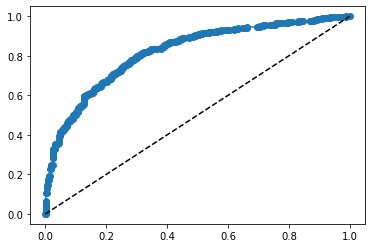

In [108]:
## ROC curve

#실제값 

y_test_fac, y_test_levels = pd.factorize(y_test) # 범주화 factor 
#y_test_fac GET!

# 예측한값
### decision_fuction() 또는 predict_proba() | bad good 예측한값(predict value)
# predict value 예측값이 아니라 decision_fuction() predict_proba() 확률을 이용하는 이유
# 값은 예측값이더라도 얼마나 확신하는 지에 따라 모델 성능이 다름

# https://subinium.github.io/MLwithPython-2-4/
# .decision_function 0에 가까울수록 판단 흘미
# . prob  0-1 
d_func = fit_logistic.decision_function(x_test) 
#d_fuc GET!

# 양성으로 판단하는 기준(threshold) 여기서 사용하진 않음
fpr, tpr, thresholds = roc_curve(y_test_fac, d_func) 
# fpr, tpr은 False Positive Rate, True Positive rate 즉 좌표

## ROC curve
plt.plot(fpr,tpr,'o-') # 점선
plt.plot([0,1],[0,1],'k--') # 선
plt.show()


In [127]:
d_func

array([-1.49415644e+00, -1.10887027e+00, -9.60277508e-01,  5.61696423e-02,
       -1.43526071e+00, -1.37034668e+00, -4.70608005e-01, -6.04753853e-01,
       -2.75219957e-01, -1.38070244e+00, -2.75219957e-01, -1.30603575e+00,
       -1.29772037e+00,  5.63106381e-01, -2.56675240e-01,  4.03666518e-01,
       -1.01618507e+00, -4.15980095e-02, -2.63075367e-01, -2.07092357e-02,
        4.03666518e-01, -5.04807733e-01, -8.77866781e-02, -1.45476918e+00,
       -1.34750925e+00,  4.58914624e-01, -2.32261286e+00, -1.20485796e+00,
        1.19003290e+00, -1.06779367e+00, -2.72772693e+00, -3.49055329e-01,
       -1.20674571e+00, -7.07170757e-01, -4.13021631e-01, -1.15400299e+00,
        2.52824138e-01, -8.93440003e-01, -7.15784528e-01, -8.20145762e-01,
       -1.57610800e-01,  1.94572284e-02,  1.14161267e+00,  6.25643466e-01,
       -2.06348145e+00, -1.56837158e+00, -7.10253930e-02, -2.44137579e-02,
       -2.44137579e-02, -1.55718916e+00, -6.84341911e-01, -2.29312303e-01,
        5.72162140e-01, -

In [126]:
thresholds

array([ 5.87747267e+00,  4.87747267e+00,  3.45813120e+00,  3.36126575e+00,
        3.02111756e+00,  3.00536838e+00,  2.94647579e+00,  2.91318046e+00,
        2.85650362e+00,  2.85146663e+00,  2.57657957e+00,  2.56677383e+00,
        2.38813535e+00,  2.38077524e+00,  2.28719867e+00,  2.27946668e+00,
        2.17777039e+00,  2.17607250e+00,  2.17521964e+00,  2.16566552e+00,
        2.10426275e+00,  2.08786530e+00,  2.06872656e+00,  2.06316025e+00,
        1.89960987e+00,  1.89612701e+00,  1.88585146e+00,  1.86779035e+00,
        1.83010284e+00,  1.82763853e+00,  1.81360735e+00,  1.66614032e+00,
        1.64980523e+00,  1.61776422e+00,  1.61704754e+00,  1.59006796e+00,
        1.58890572e+00,  1.53254790e+00,  1.52830690e+00,  1.52052515e+00,
        1.48514573e+00,  1.48072706e+00,  1.47420350e+00,  1.45171309e+00,
        1.44229276e+00,  1.41381959e+00,  1.39999975e+00,  1.38221407e+00,
        1.38205008e+00,  1.38146824e+00,  1.37323865e+00,  1.36008105e+00,
        1.36007796e+00,  

In [120]:

## AUC
auc(fpr,tpr)

0.8206203882043569

#### 변수중요도

In [121]:
from statsmodels.api import OLS

In [125]:
## 유의확률 (p-value) 확인 
# p-value : 0.05 기준 이하면 유의

y_arr = y_test_fac
x_arr = x_test.to_numpy()
OLS(y_arr,x_arr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.664
Method:                 Least Squares   F-statistic:                              172.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   5.12e-217
Time:                        14:46:21   Log-Likelihood:                         -521.95
No. Observations:                 955   AIC:                                      1066.
Df Residuals:                     944   BIC:                                      1119.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0080      0.014      0.571      0.568      -0.019       0.035
x2            -0.5694      0.106     -5.363      0.000      -0.778      -0.361
x3            -0.0941      0.126     -0.750      0.454      -0.340       0.152
x4             0.0016      0.010      0.154      0.877      -0.018       0.022
x5            -0.6551      0.346     -1.894      0.059      -1.334       0.024
x6             0.0036      0.002      1.941      0.053   -4.06e-05       0.007
x7            -0.0027      0.001     -4.572      0.000      -0.004      -0.002
x8            -0.7029      0.522     -1.346      0.179      -1.728       0.322
x9            -0.1283      0.133     -0.965      0.335      -0.389       0.133
x10            0.5204      0.094      5.516      0.000       0.335       0.706
x11            0.1625      0.014     11.421      0.000       0.135       0.190
==============================================================================
Omnibus:                       79.363   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.124
Skew:                           0.048   Prob(JB):                     2.12e-06
Kurtosis:                       2.195   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4-2. 결정트리

In [129]:
data_test.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34.0,0.9978,3.51,0.56,9.4,Bad
1,5.6,0.615,0.00,1.6,0.089,16,59.0,0.9943,3.58,0.52,9.9,Bad
2,7.8,0.610,0.29,1.6,0.114,9,29.0,0.9974,3.26,1.56,9.1,Bad
3,8.1,0.560,0.28,1.7,0.368,16,56.0,0.9968,3.11,1.28,9.3,Bad
4,7.4,0.590,0.08,4.4,0.086,6,29.0,0.9974,3.38,0.50,9.0,Bad


In [131]:
from sklearn import tree
import matplotlib.pyplot as plt

#### 모형적합


In [132]:
dtree = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf = 50) 
# 최대 깊이 3, 샘플이 최소 얼마여야 잎노드를 만들거냐 50

fit_dtree = dtree.fit(x_train, y_train)

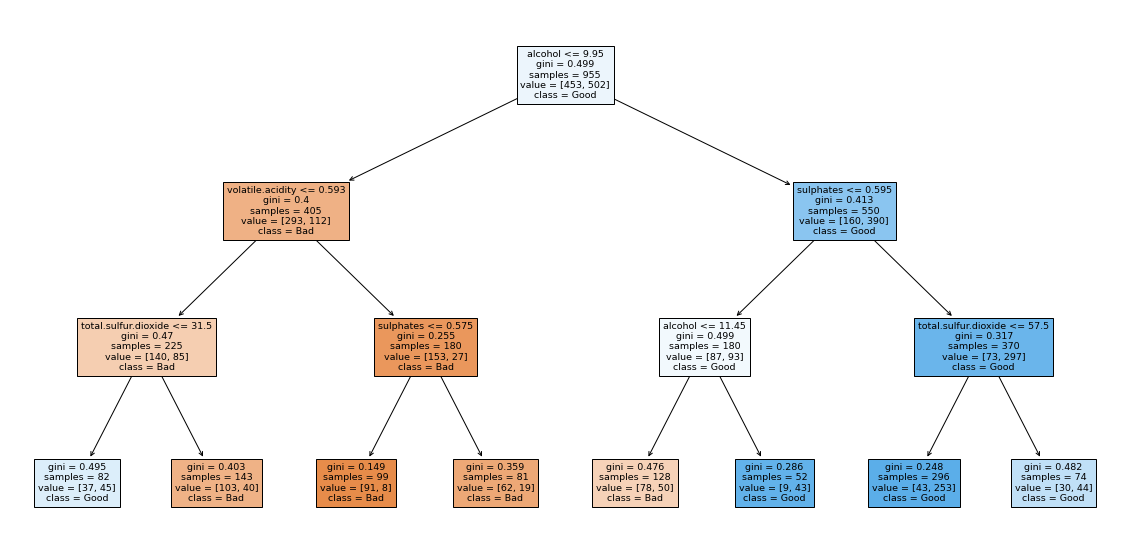

In [135]:
## 출력 변수 범주화

y_test_fac, y_test_levels = pd.factorize(y_test)

# 모형확인 
plt.figure(figsize=(20,10))
tree_plot = tree.plot_tree(fit_dtree, filled = True, feature_names = x_test.columns, class_names = y_test_levels)

#### 정오 분류표

In [137]:
## 검정자료 예측 
pred_dtree = fit_dtree.predict(x_test)
## 정오분류표
pd.crosstab(y_test, pred_dtree)

col_0,Bad,Good
quality,,
Bad,334,119
Good,117,385


In [140]:
### confusion Matrix and 
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

         Bad       0.74      0.74      0.74       453
        Good       0.76      0.77      0.77       502

    accuracy                           0.75       955
   macro avg       0.75      0.75      0.75       955
weighted avg       0.75      0.75      0.75       955



In [141]:
## ROC AUC

fit_dtree.predict_proba(x_test)

array([[0.91919192, 0.08080808],
       [0.7654321 , 0.2345679 ],
       [0.7654321 , 0.2345679 ],
       ...,
       [0.609375  , 0.390625  ],
       [0.14527027, 0.85472973],
       [0.14527027, 0.85472973]])

In [142]:
###예측확률
fit_dtree.predict_proba(x_test)

array([[0.91919192, 0.08080808],
       [0.7654321 , 0.2345679 ],
       [0.7654321 , 0.2345679 ],
       ...,
       [0.609375  , 0.390625  ],
       [0.14527027, 0.85472973],
       [0.14527027, 0.85472973]])

In [143]:
fit_dtree.predict_proba(x_test)

array([[0.91919192, 0.08080808],
       [0.7654321 , 0.2345679 ],
       [0.7654321 , 0.2345679 ],
       ...,
       [0.609375  , 0.390625  ],
       [0.14527027, 0.85472973],
       [0.14527027, 0.85472973]])

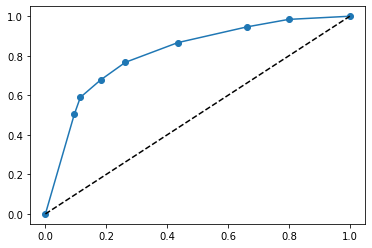

In [144]:
### roc 
d_func = fit_dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_fac,d_func)

plt.plot(fpr,tpr,'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [145]:
# auc
auc(fpr,tpr)

0.8138065838192484

#### 변수중요도

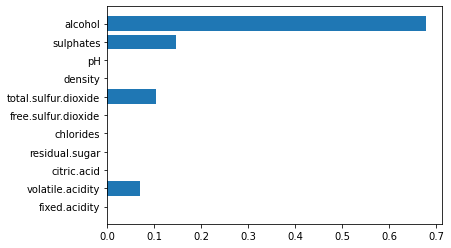

In [176]:
importances = fit_dtree.feature_importances_
idx = x_train.columns

plt.barh(idx,importances)
plt.show()

### 4-3. SVM

    *R에서는 Scale 해주지만, Python scykit learn 은 Scale 안해줌

출력변수도 scale 변환을 하면 나중에 실제값을 알려고 할때 다시 변환 해줘야함
그래서 출력변수 y는 변환 하지 않음

In [147]:
from sklearn.svm import SVC

In [172]:
data_file = easygui.fileopenbox("Training data")
data_train = pd.read_csv(data_file)

In [173]:
data_file = easygui.fileopenbox("Test data")
data_test = pd.read_csv(data_file)

In [201]:
x_train = data_train.iloc[:,0:11]
y_train = data_train.quality

x_test = data_test.iloc[:,0:11]
y_test = data_test.quality



In [175]:
x_train_columns = x_train.columns


#### 스케일 조정


In [178]:
## 표준화 변환
#  반드시 x_train 기준으로 x_test도 스케일 조정 : 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### 모형적합


In [179]:
svc = SVC(kernel= 'rbf',gamma='auto',C=1)
fit_svc = svc.fit(x_train, y_train)

#### 정오분류표

In [180]:
### 검정자료 예측
pred_svc = fit_svc.predict(x_test)

In [181]:
### 정오분류표
pd.crosstab(y_test, pred_svc)

col_0,Bad,Good
quality,,
Bad,224,67
Good,86,267


In [182]:
# confusion Matrix
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

         Bad       0.72      0.77      0.75       291
        Good       0.80      0.76      0.78       353

    accuracy                           0.76       644
   macro avg       0.76      0.76      0.76       644
weighted avg       0.76      0.76      0.76       644



#### 매개변수 최적화 

    * gamma와 c에 뭘 넣을까

In [154]:
from sklearn.model_selection import GridSearchCV

In [183]:
# Set the param by cross-validation 5번
tuned_parameters = {'kernel':['rbf'], # 커널은 1개 2갠가 3갠가 
                   'gamma':[0.01,0.05, 0.1, 0.5,1],
                   'C': [1,10,50,100,150]}

# kernel 1 * gamma 5 * C 5 * CV 5 = 125번

In [184]:
## parameter tuning
grid = GridSearchCV(SVC(), tuned_parameters)
%time grid.fit(x_train, y_train)

Wall time: 10.8 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 50, 100, 150],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1],
                         'kernel': ['rbf']})

In [185]:
grid.best_params_

{'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}

#### Tuned 모형 적합

In [186]:
svc = SVC(kernel= 'rbf',gamma=grid.best_params_['gamma'],C=grid.best_params_['C'])
fit_svc_tune = svc.fit(x_train, y_train)

#### 정오분류표

In [187]:
## 검정자료 예측
pred_svc_tune = fit_svc_tune.predict(x_test)

In [188]:
## 정오분류표
pd.crosstab(y_test, pred_svc_tune)

col_0,Bad,Good
quality,,
Bad,224,67
Good,90,263


In [189]:
## confusion Matrix
print(classification_report(y_test,pred_svc_tune))

              precision    recall  f1-score   support

         Bad       0.71      0.77      0.74       291
        Good       0.80      0.75      0.77       353

    accuracy                           0.76       644
   macro avg       0.76      0.76      0.76       644
weighted avg       0.76      0.76      0.76       644



#### ROC AUC

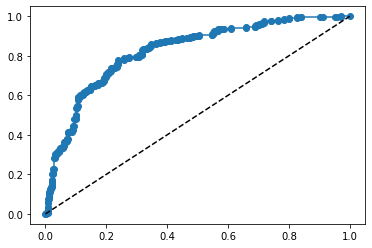

In [190]:
y_test_fac, y_test_levels = pd.factorize(y_test)
d_func = fit_svc_tune.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test_fac,d_func)

plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()


In [191]:
auc(fpr,tpr)

0.8260662169134467

#### 변수 중요도


In [193]:
x_train_columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

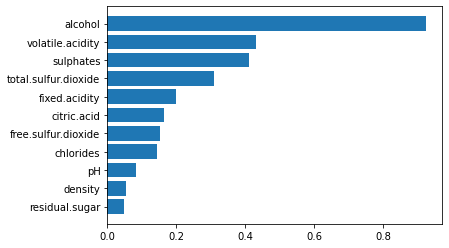

In [194]:
## 변수 중요도 ( kernel linear)
## 손수 변수를 넣고 빼고 하며 변수를 정하는게 좋음
def f_importances(coef,names):
    imp = list(map(abs,coef))
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)),imp,align='center')
    plt.yticks(range(len(names)),names)
    plt.show()
# 선형 커널 사용
fit_svc_linear = SVC(kernel='linear').fit(x_train,y_train)
importances = fit_svc_linear.coef_.tolist()[0]
idx = x_train_columns
f_importances(importances, idx)

### 4-4. NN 신경망

In [198]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#### 표준화

In [202]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train  = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

#### 모형적합


In [203]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,))
#(5,5,4) #layer 3개 노드 5,5,4개씩
fit_mlp = mlp.fit(x_train,y_train)

C:\Users\gkrxo\anaconda3\envs\DataCampus\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### 정오분류표

In [204]:
## 검정자료 예측
pred_mlp = fit_mlp.predict(x_test)
### 정오분류표
pd.crosstab(y_test,pred_mlp)

col_0,Bad,Good
quality,,
Bad,207,84
Good,87,266


In [205]:
## Confusion Matrix
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

         Bad       0.70      0.71      0.71       291
        Good       0.76      0.75      0.76       353

    accuracy                           0.73       644
   macro avg       0.73      0.73      0.73       644
weighted avg       0.73      0.73      0.73       644



#### ROC AUC

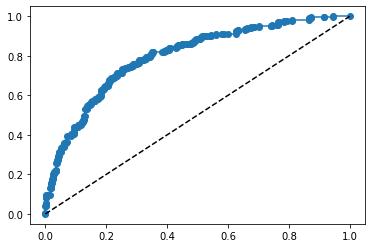

In [207]:
y_test_fac, y_test_levels = pd.factorize(y_test)
d_func = fit_mlp.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_fac,d_func)

plt.plot(fpr, tpr, 'o-')
plt.plot([0,1],[0,1],'k--')
plt.show()


In [208]:
auc(fpr,tpr)

0.7983314350242885

#### 변수중요도 (weights)

 절대값이 0 근처는 중요도 낮다
 레이어가 1개일때만.

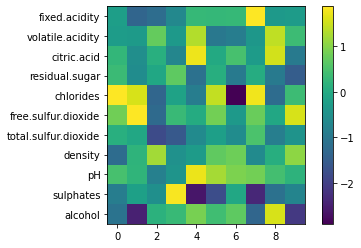

In [209]:
plt.imshow(fit_mlp.coefs_[0])
plt.yticks(range(len(x_train_columns)),x_train_columns)
plt.colorbar()
plt.show()

------------------------------


## 5. 비지도학습

### 5-1. 계층적 군집(Hierarchical Clustering)

 왜 사용할까? 군집별로 모델 학습 -> 잡음 감소

* 유사성 - 범주형, 유사성
* 거리 - 연속형

* 중심 (Centroid linkage)
* 각각 (Single likage)
* 먼것 (Complete linkage)

* 평균 (Average linkage)
* MSE (Ward's method)


library : scipy

In [210]:
import easygui
import pandas as pd

In [211]:
data_file = easygui.fileopenbox("Data file")

In [213]:
data_raw = pd.read_csv(data_file,encoding='cp949')


In [214]:
data_raw.shape

(22, 6)

In [215]:
data_raw.head()

,역명,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
0,갈마,149.684211,301.578947,130.703947,118.506579,112.519737
1,갑천,64.059211,116.302632,49.921053,44.282895,38.539474
2,구암,140.750000,218.875000,127.526316,115.144737,112.407895
3,노은,251.750000,263.901316,215.302632,193.000000,180.592105
4,대동,247.282895,434.157895,199.282895,191.250000,162.289474


In [216]:
data_raw.describe()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,378.079246,340.858852,258.989533,219.628589,205.677931
std,248.895650,190.149642,158.627703,136.004752,130.761985
min,64.059211,116.302632,49.921053,44.282895,38.539474
25%,199.939145,222.856908,135.498355,113.570724,110.833882
50%,308.243421,272.121711,204.657895,183.328947,165.921053
75%,520.695724,425.845395,380.180921,306.156250,275.044408
max,1008.072368,809.947368,648.401316,597.664474,603.815789


#### 모형적합

In [217]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [230]:
#연속형 자료 선택
data_use = data_raw.iloc[:,1:] # 0번째 열을 제외한 나머지는 data_use로
data_use.index = data_raw.iloc[:,0].tolist() # 0번째 열은 index로
data_use.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
갈마,149.684211,301.578947,130.703947,118.506579,112.519737
갑천,64.059211,116.302632,49.921053,44.282895,38.539474
구암,140.750000,218.875000,127.526316,115.144737,112.407895
노은,251.750000,263.901316,215.302632,193.000000,180.592105
대동,247.282895,434.157895,199.282895,191.250000,162.289474


In [231]:
# 평균연결법, euclidean 거리
d = linkage(data_use, method = 'average', metric = 'euclidean')

In [257]:
import matplotlib.pyplot as plt
# 그래프에 굴림
plt.rcParams['font.family']='Gulim'

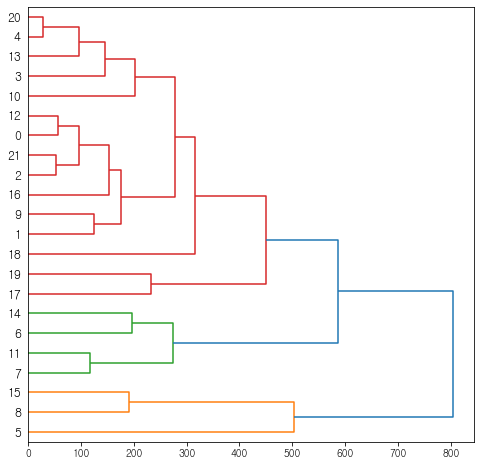

In [259]:
### Dendrogram
plt.figure(figsize = (8,8))
#labels = data_use.index,
dn = dendrogram(d,  leaf_font_size = 12, leaf_rotation=0, orientation='right')

군집별 특성 파악 필요

#### 군집저장

In [234]:
from scipy.cluster.hierarchy import fcluster

In [235]:
## 군집저장 
# 클러스터 나눔
# python에서 a=1 b=a면 a=b=1 임. 각각하려면 .copy()
data_cluster = data_use.copy() 
data_cluster['cluster'] = fcluster(d, t=550, criterion='distance')
data_cluster.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시,cluster
갈마,149.684211,301.578947,130.703947,118.506579,112.519737,3
갑천,64.059211,116.302632,49.921053,44.282895,38.539474,3
구암,140.750000,218.875000,127.526316,115.144737,112.407895,3
노은,251.750000,263.901316,215.302632,193.000000,180.592105,3
대동,247.282895,434.157895,199.282895,191.250000,162.289474,3


#### 군집평균

In [236]:
cluster_mean = data_cluster.groupby('cluster').mean()
cluster_mean 

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
cluster,,,,,
1,858.462719,300.482456,528.899123,437.228070,406.403509
2,462.069079,670.427632,376.297697,324.631579,307.870066
3,259.605263,261.049123,173.725439,148.107895,138.281579


* 1번 클러스터는 18-19
* 2번은 8-9
* 3번은 모두 낮음

In [251]:
data_cluster['cluster']

갈마        3
갑천        3
구암        3
노은        3
대동        3
대전        1
반석        2
서대전네거리    2
시청        1
신흥        3
오룡        3
용문        2
월드컵경기장    3
월평        3
유성온천      2
정부청사      1
중구청       3
중앙로       3
지족        3
탄방        3
판암        3
현충원       3
Name: cluster, dtype: int32

In [253]:
pd.Series(data_use.index)

0         갈마
1         갑천
2         구암
3         노은
4         대동
5         대전
6         반석
7     서대전네거리
8         시청
9         신흥
10        오룡
11        용문
12    월드컵경기장
13        월평
14      유성온천
15      정부청사
16       중구청
17       중앙로
18        지족
19        탄방
20        판암
21       현충원
dtype: object

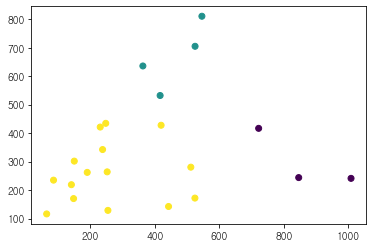

In [255]:
# 군집 산점도
# 5변수-> 2변수 
# 분산이 큰 2개 변수
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = data_cluster['cluster'])



TypeError: Index(...) must be called with a collection of some kind, 2 was passed

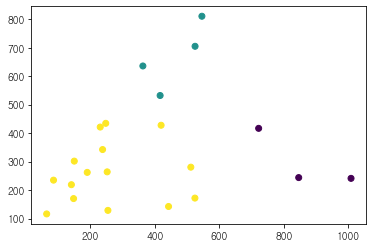

In [264]:
# 군집 산점도
# 5변수-> 2변수 
# 분산이 큰 2개 변수
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = data_cluster['cluster'])
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = cluster_mean.index, s= 200, alpha = 0.7);

### 5-2. K-means 군집

* 장: 적절한 K 잡으면 군집 속도 빠름, 성능 좋음 (유전자 군집)
* 단: 뭉쳐있는 데이터는 매번 달라짐

In [265]:
data_raw.head()

,역명,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
0,갈마,149.684211,301.578947,130.703947,118.506579,112.519737
1,갑천,64.059211,116.302632,49.921053,44.282895,38.539474
2,구암,140.750000,218.875000,127.526316,115.144737,112.407895
3,노은,251.750000,263.901316,215.302632,193.000000,180.592105
4,대동,247.282895,434.157895,199.282895,191.250000,162.289474


#### 모형적합

In [266]:
from sklearn.cluster import KMeans

In [267]:
data_use.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
갈마,149.684211,301.578947,130.703947,118.506579,112.519737
갑천,64.059211,116.302632,49.921053,44.282895,38.539474
구암,140.750000,218.875000,127.526316,115.144737,112.407895
노은,251.750000,263.901316,215.302632,193.000000,180.592105
대동,247.282895,434.157895,199.282895,191.250000,162.289474


In [268]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_use)

KMeans(n_clusters=3)

#### 군집저장

In [269]:
data_cluster = data_use.copy()
data_cluster['cluster'] = kmeans.labels_
data_cluster.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시,cluster
갈마,149.684211,301.578947,130.703947,118.506579,112.519737,0
갑천,64.059211,116.302632,49.921053,44.282895,38.539474,0
구암,140.750000,218.875000,127.526316,115.144737,112.407895,0
노은,251.750000,263.901316,215.302632,193.000000,180.592105,0
대동,247.282895,434.157895,199.282895,191.250000,162.289474,0


#### 군집평균

In [270]:
cluster_mean = data_cluster.groupby('cluster').mean()
cluster_mean

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
cluster,,,,,
0,240.729323,267.420583,156.047932,134.074718,126.731673
1,774.814145,268.324013,501.976974,414.064145,379.797697
2,462.069079,670.427632,376.297697,324.631579,307.870066


* 1변수는 2번
* 2변수는 1번
* 모든 변수 적은 0번

In [271]:
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 22.

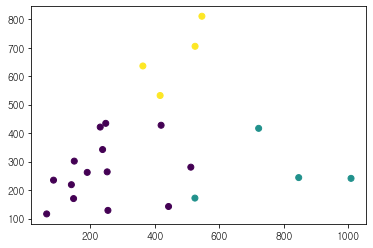

In [272]:
# 군집 산점도
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = data_cluster['cluster'])
# 군집 평균
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = cluster_mean.index, s= 200, alpha = 0.7);

### 5-3-1. 최적 군집수 K

Inertia value

In [275]:
model.inertia_

159443.44192528678

[3336158.031620052]
[3336158.031620052, 1460102.910084919]
[3336158.031620052, 1460102.910084919, 895555.8247742194]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124, 475784.0426773154]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124, 475784.0426773154, 330780.18415257544]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124, 475784.0426773154, 330780.18415257544, 260318.76372232908]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124, 475784.0426773154, 330780.18415257544, 260318.76372232908, 189075.05638688247]
[3336158.031620052, 1460102.910084919, 895555.8247742194, 649318.6965994124, 475784.0426773154, 330780.18415257544, 260318.76372232908, 189075.05638688247, 157657.8976291712]


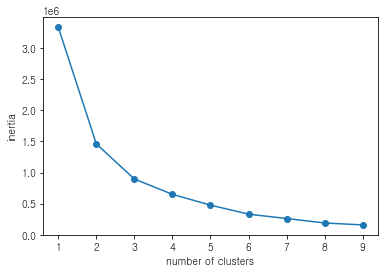

In [280]:
## 군집의 범위
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k).fit(data_use)
    inertias.append(model.inertia_)
    print(inertias)
# plot of inertia values
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
# plt.xticks(ks)
plt.show()

### 5-3. DBSCAN 밀도기반 군집

K-means 치명적 단점 선으로 분리 -> 밀도가 높은 data끼리 군집을 만들면?

* MinPts : min points 최소 몇개 점이어야 군집인가?

- 많음 : core points 
- 같음 : border points
- 적음 : noise points


데이터  수에 따라 군집 밀도가 다름 -> 표준화 필요

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
data_use.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
갈마,149.684211,301.578947,130.703947,118.506579,112.519737
갑천,64.059211,116.302632,49.921053,44.282895,38.539474
구암,140.750000,218.875000,127.526316,115.144737,112.407895
노은,251.750000,263.901316,215.302632,193.000000,180.592105
대동,247.282895,434.157895,199.282895,191.250000,162.289474


In [286]:
#표준화 변환
scaler = StandardScaler()
scaler.fit(data_use)
data_std = scaler.transform(data_use)


#### 모형적합

In [287]:
from sklearn.cluster import DBSCAN

In [288]:
# eps(입실론) 해당 거리내 , min_samples 개 있으면 군집
dbscan = DBSCAN(eps=1.5,min_samples=3)
fit_dbscan = dbscan.fit(data_std)

#### 군집저장

In [290]:
data_cluster = data_use.copy()
data_cluster['cluster'] = fit_dbscan.labels_
data_cluster.head()

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시,cluster
갈마,149.684211,301.578947,130.703947,118.506579,112.519737,0
갑천,64.059211,116.302632,49.921053,44.282895,38.539474,0
구암,140.750000,218.875000,127.526316,115.144737,112.407895,0
노은,251.750000,263.901316,215.302632,193.000000,180.592105,0
대동,247.282895,434.157895,199.282895,191.250000,162.289474,0


#### 군집평균

In [292]:
cluster_mean = data_cluster.groupby('cluster').mean()
cluster_mean

,X18.19시,X08.09시,X17.18시,X16.17시,X15.16시
cluster,,,,,
-1,774.814145,268.324013,501.976974,414.064145,379.797697
0,240.729323,267.420583,156.047932,134.074718,126.731673
1,462.069079,670.427632,376.297697,324.631579,307.870066


#### 군집산점도

In [293]:
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 22.

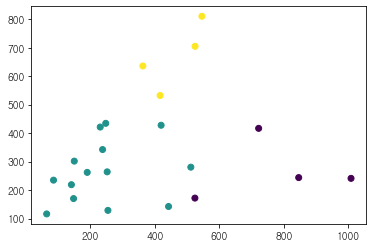

In [294]:
## 군집 산점도 

plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = data_cluster['cluster'])
# 군집 평균
plt.scatter(data_cluster['X18.19시'], data_cluster['X08.09시'], c = cluster_mean.index, s= 200, alpha = 0.7);